# Analysis notebook: `SU2020b_CRY_mix2BB_onspill-LH_aw`  

## Define analysis name

In [15]:
ana_label = "SU2020b_CRY_mix2BB_onspill-LH_aw"

## Preamble

In [16]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [17]:
!ls ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw

analysis.csv	hists.h5     SU2020b_CRY_mix2BB_onspill-LH_aw.log
cut_flow.csv	info.txt     SU2020b_CRY_mix2BB_onspill-LH_aw.yaml
events.parquet	results.pkl


In [18]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw


In [19]:
results = loader.load_pkl() 
# results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_mix2BB_onspill-LH_aw/results.pkl


## Analyse results

### Cut flow

In [30]:
display(results["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100,100,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2054807,95.106,96.628,Electron track fits
3,one_reco_electron,Preselect,1479584,68.482,72.006,One reco electron / event
4,is_downstream,Preselect,825787,38.221,55.812,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,258271,11.954,31.276,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,182914,8.466,70.823,Track fit quality > 0.2
7,within_t0,Tracker,149420,6.916,81.689,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,140902,6.522,94.299,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,139272,6.446,98.843,>20 active tracker hits


### Efficiency & rates

In [31]:
display(results["analysis"])

Window,Wide,Extended,Signal
Generated,"41,100,000,000","41,100,000,000","41,100,000,000"
Selected,"16,981","2,661",333
Unvetoed,89,1,0
Selection Eff [%],4.13e-05,6.47e-06,8.10e-07
Selection Eff Err$-$ [%],-3.16e-07,-1.24e-07,-4.32e-08
Selection Eff Err$+$ [%],3.18e-07,1.27e-07,4.56e-08
Veto Eff [%],99.476,99.962,100
Veto Eff Err$-$ [%],-0.058,-0.061,-0.299
Veto Eff Err$+$ [%],0.053,0.023,0
Livetime [days],1.20e+04,951.815,123.611


### Histograms

In [22]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Load] ✅ Initialised with out_path=test_out
[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_1x3_mom_windows.png


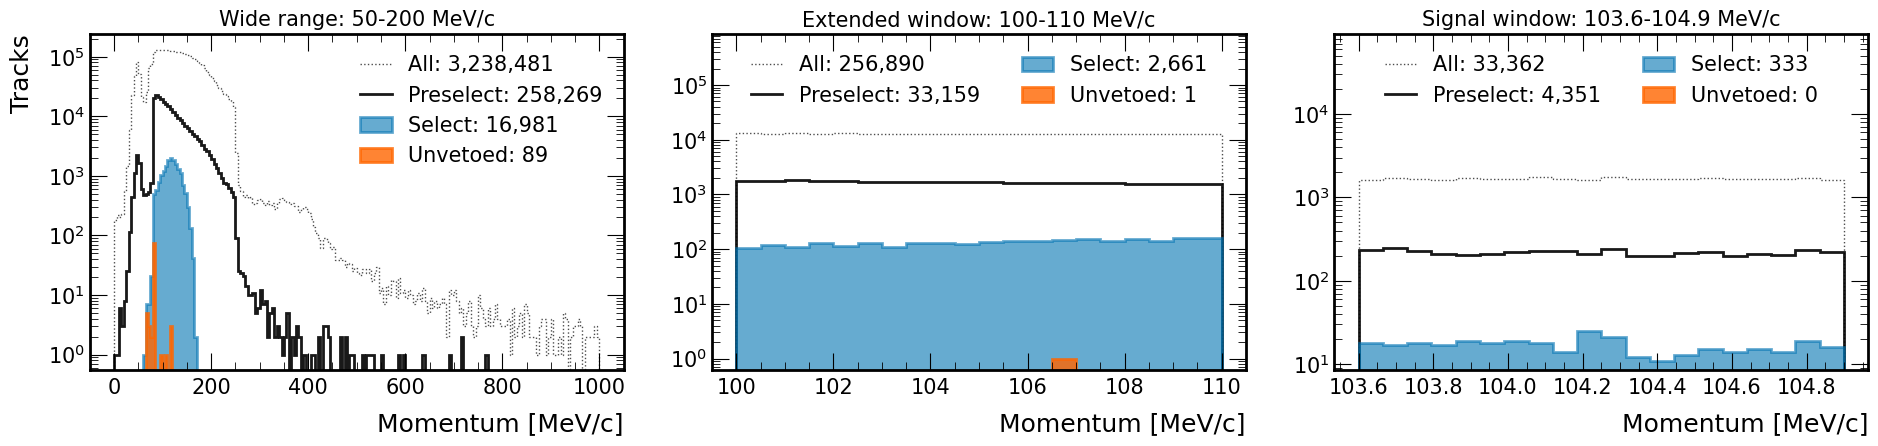

In [23]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_3x3_summary.png


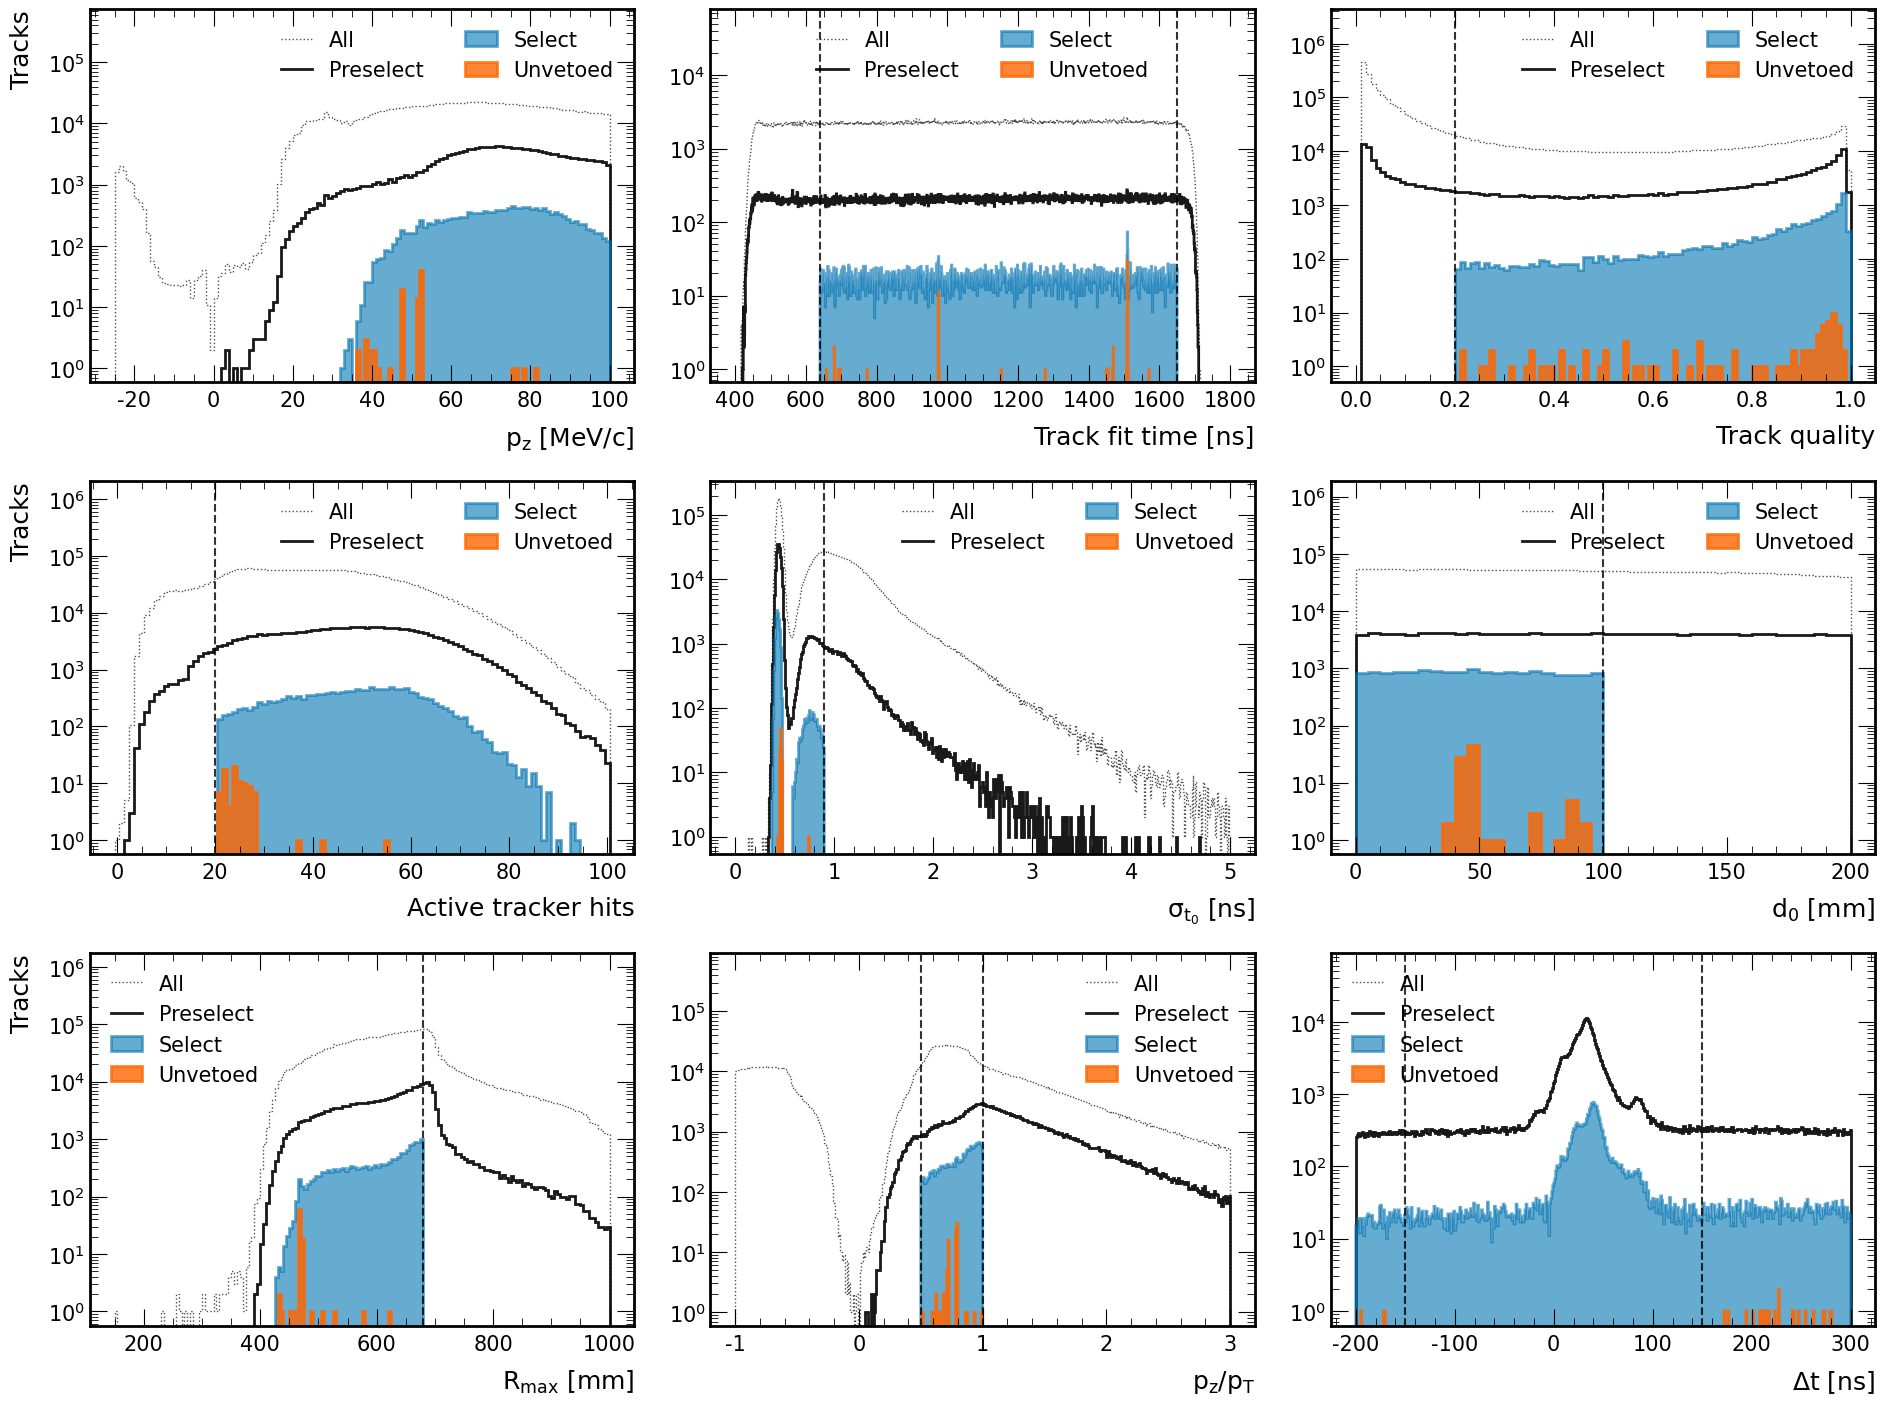

In [24]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_2x2_mom_summary.png


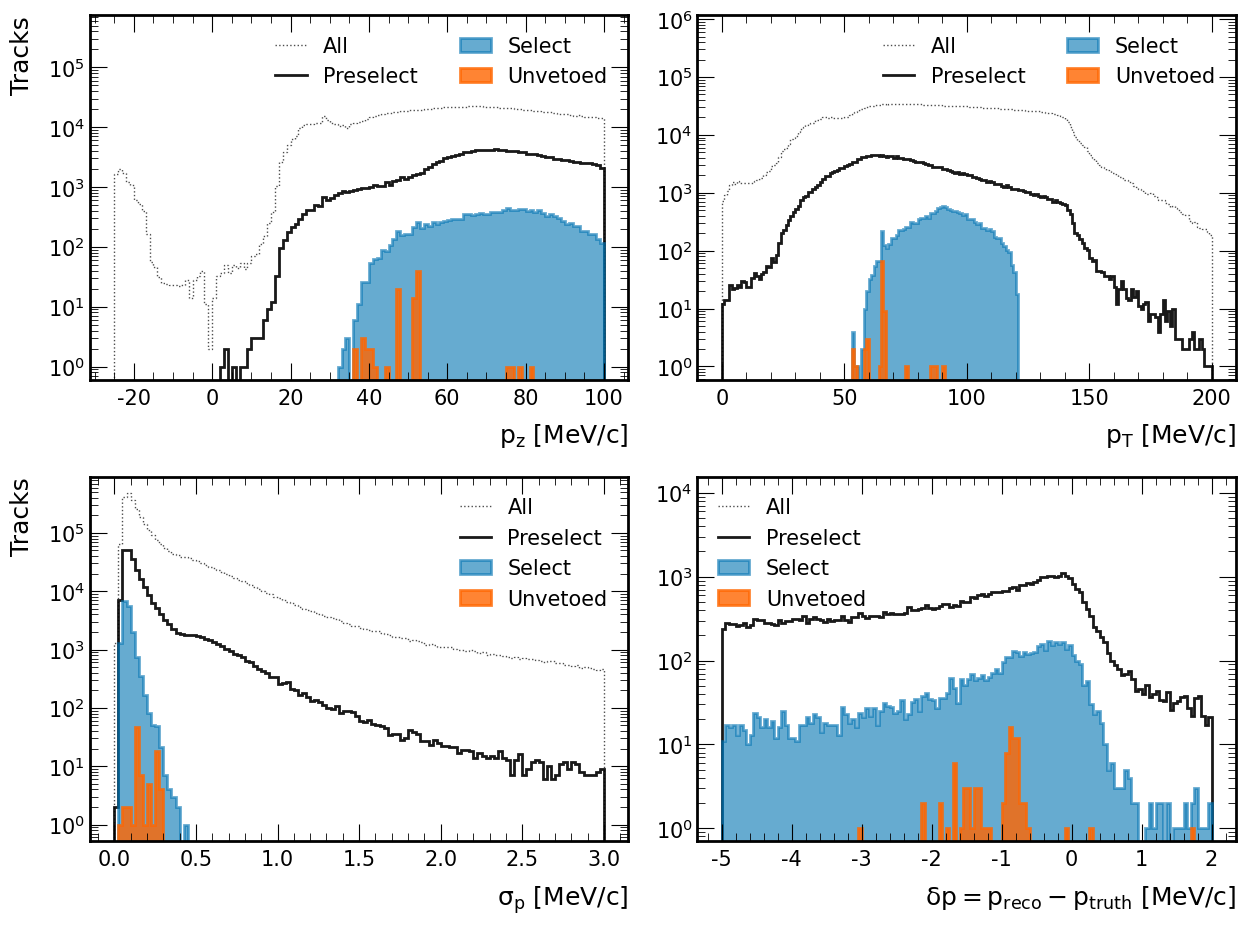

In [25]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_mix2BB_onspill-LH_aw/h1o_crv_z.png


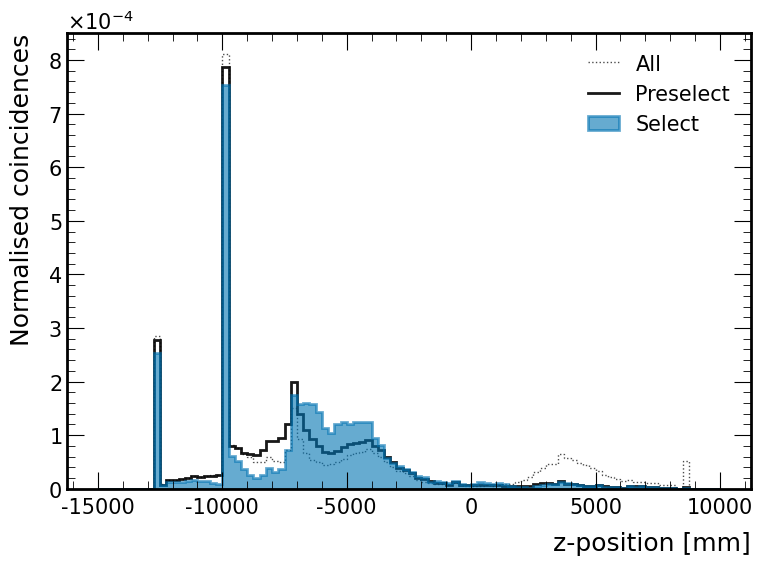

In [26]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [27]:
print(results["event_info"])

  Index:            11
  Subrun:           [2749, 3597]
  Event:            [330463, 421645]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_06_00.001202_00000038.root
  Track time [ns]:  966.249762, 966.253530
  Coinc time [ns]:  393.212616, 388.473175, 723.652710, 467.014069, 1567.032227, 504.604431, 1489.008423, 1187.594849, 419.856262
  dt [ns]:          573.037146
----------------------------------------
  Index:            31
  Subrun:           [5610, 8198]
  Event:            [5316, 495784]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC2020aw_best_v1_3_v06_06_00.001202_00000047.root
  Track time [ns]:  965.515439, 966.356729
  Coinc time [ns]:  1197.272583, 522.824768, 555.011719
  dt [ns]:          231.757144
----------------------------------------
  Index:            45
  Subrun:           [2950, 3522, 3710]
  Event:            [470264, 19933, 247781]
  File:             nts.mu2e.CosmicCRYSignalAllMix2BBTriggered.MDC

In [28]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 89 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 2749
evt.event: 330463
crv.crvcoincs.time: [393, 388, 724]
crv.crvcoincs.nHits: [9, 21, 45]
crv.crvcoincs.pos.fCoordinates.fZ: [-7.69e+03, 6.87e+03, -9.96e+03]
at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, False, False]
within_t0: [True, True, True, True]
within_t0err: [True, False, True, False]
has_hits: [True, False, True, False]
within_d0: [True, True, True, True]
pitch_angle: [[0.652, 0.64, 0.559, 0.304, 0.306, ..., 0.11, 0.204, 0.202, 0.306, 0.304],